In [51]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from graphviz import Source
import matplotlib.pyplot as plt

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = boston.data
y = boston.target

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [8]:
xgbreg = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10,seed=123)

In [25]:
xgbreg.fit(X_train,y_train)

pred = xgbreg.predict(X_test)

imp_features = pd.Series(xgbreg.feature_importances_) 
imp_features.index = boston.feature_names
print(imp_features)

CRIM       0.019539
ZN         0.000000
INDUS      0.008655
CHAS       0.000000
NOX        0.029470
RM         0.473747
AGE        0.017721
DIS        0.027506
RAD        0.010793
TAX        0.016018
PTRATIO    0.019315
B          0.009667
LSTAT      0.367568
dtype: float32


In [12]:
print(np.sqrt(mean_squared_error(y_test,pred)))

3.7824431053497274


In [15]:
reg = LinearRegression()
reg.fit(X_train,y_train)
pred_li = reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_li)))

5.309659665032172


In [18]:
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

params = {"booster":"gblinear","objective":"reg:squarederror"}
xg_reg = xgb.train(params = params , dtrain = DM_train , num_boost_round = 10)

pred_xg = xg_reg.predict(DM_test)
print(np.sqrt(mean_squared_error(y_test,pred_xg)))

6.5452273089848925


# L1 Regularization (alpha)

In [20]:
X =pd.DataFrame(boston.data,columns=boston.feature_names)
y =boston.target

In [21]:
X_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
params = {"objective":"reg:squarederror","max_depth":"4"}
l1_params = [0.01,0.1,1,10,100]
rmse_l1 = []

for i in l1_params:
    params["alpha"] = i
    cv_results = xgb.cv(dtrain=X_dmatrix,params=params,nfold=5,num_boost_round=10,metrics="rmse",as_pandas=True,seed=123)
    rmse_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
    
    
print("Best rmse as a function of l1")
print(pd.DataFrame(list(zip(l1_params,rmse_l1)),columns=["l1_params","rmse_l1"]))
    

Best rmse as a function of l1
   l1_params   rmse_l1
0       0.01  3.485725
1       0.10  3.436944
2       1.00  3.635337
3      10.00  3.747590
4     100.00  4.513447


In [ ]:
# # L2 regulatization (lambda)
# Example 

# ### Create the DMatrix: housing_dmatrix
# housing_dmatrix = xgb.DMatrix(data=X, label=y)

# reg_params = [1, 10, 100]

# ### Create the initial parameter dictionary for varying l2 strength: params
# params = {"objective":"reg:linear","max_depth":3}

# ### Create an empty list for storing rmses as a function of l2 complexity
# rmses_l2 = []

# ### Iterate over reg_params
# for reg in reg_params:

#     # Update l2 strength
#     params["lambda"] = reg
    
#     # Pass this updated param dictionary into cv
#     cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
#     # Append best rmse (final round) to rmses_l2
#     rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# ### Look at best rmse per l2 param
# print("Best rmse as a function of l2:")
# print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

# Visualizing individual XGBoost trees

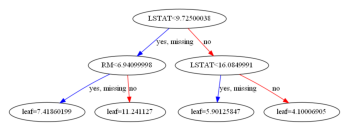

In [29]:
# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=X_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()


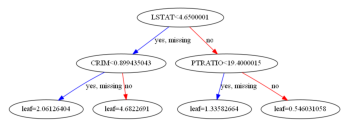

In [27]:
# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=5)
plt.show()


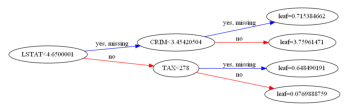

In [28]:

# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR")
plt.show()

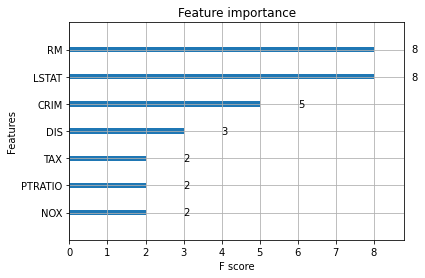

In [30]:
# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()